In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error


In [17]:
df = pd.read_csv('INSURANCE_.csv')
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [18]:
df.isna().sum()


id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [19]:
df = df[['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Vintage', 'Response', 'Annual_Premium']]
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Policy_Sales_Channel  Vintage  Response  \
0   > 2 Years            Yes                  26.0      217         1   
1    1-2 Year             No                  26.0      183         0   
2   > 2 Years            Yes                  26.0       27         1   
3    < 1 Year             No                 152.0      203         0   
4    < 1 Year             No                 152.0       39         0   

   Annual_Premium  
0         40454.0  
1         33536.0  
2         38294.0  
3         28619.0  
4         27496.0

In [20]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Vehicle_Age']= label_encoder.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage']= label_encoder.fit_transform(df['Vehicle_Damage'])
df

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1       1   44                1         28.0                   0   
1            2       1   76                1          3.0                   0   
2            3       1   47                1         28.0                   0   
3            4       1   21                1         11.0                   1   
4            5       0   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105       1   74                1         26.0                   1   
381105  381106       1   30                1         37.0                   1   
381106  381107       1   21                1         30.0                   1   
381107  381108       0   68                1         14.0                   0   
381108  381109       1   46                1         29.0                   0   

        Vehicle_Age  Vehicle_Damage  Policy_Sales_Channel  Vintage  Response  \
0                 2               1                  26.0      217         1   
1                 0               0                  26.0      183         0   
2                 2               1                  26.0       27         1   
3                 1               0                 152.0      203         0   
4                 1               0                 152.0       39         0   
...             ...             ...                   ...      ...       ...   
381104            0               0                  26.0       88         0   
381105            1               0                 152.0      131         0   
381106            1               0                 160.0      161         0   
381107            2               1                 124.0       74         0   
381108            0               0                  26.0      237         0   

        Annual_Premium  
0              40454.0  
1              33536.0  
2              38294.0  
3              28619.0  
4              27496.0  
...                ...  
381104         30170.0  
381105         40016.0  
381106         35118.0  
381107         44617.0  
381108         41777.0  

[381109 rows x 12 columns]

In [21]:
rs = np.random.RandomState(0)
# df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

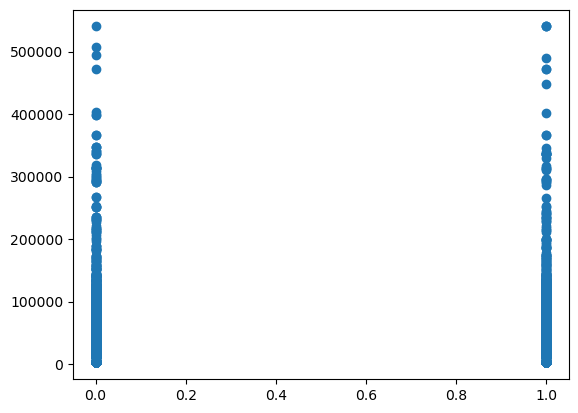

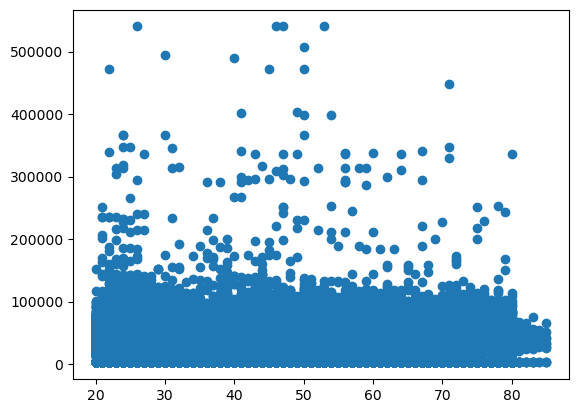

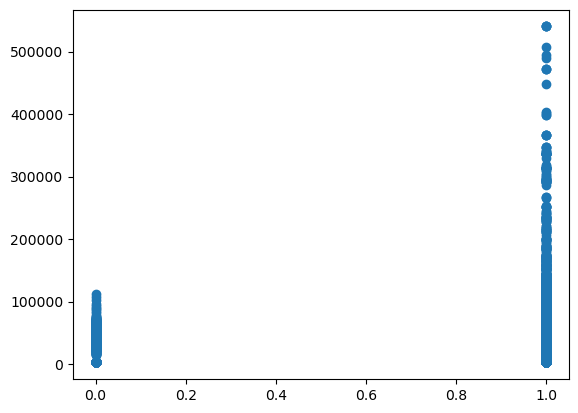

In [22]:

plt.scatter(df['Gender'],df['Annual_Premium'])
plt.show()
plt.scatter(df['Age'],df['Annual_Premium'])
plt.show()
plt.scatter(df['Driving_License'],df['Annual_Premium'])


In [23]:
df

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1       1   44                1         28.0                   0   
1            2       1   76                1          3.0                   0   
2            3       1   47                1         28.0                   0   
3            4       1   21                1         11.0                   1   
4            5       0   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105       1   74                1         26.0                   1   
381105  381106       1   30                1         37.0                   1   
381106  381107       1   21                1         30.0                   1   
381107  381108       0   68                1         14.0                   0   
381108  381109       1   46                1         29.0                   0   

        Vehicle_Age  Vehicle_Damage  Policy_Sales_Channel  Vintage  Response  \
0                 2               1                  26.0      217         1   
1                 0               0                  26.0      183         0   
2                 2               1                  26.0       27         1   
3                 1               0                 152.0      203         0   
4                 1               0                 152.0       39         0   
...             ...             ...                   ...      ...       ...   
381104            0               0                  26.0       88         0   
381105            1               0                 152.0      131         0   
381106            1               0                 160.0      161         0   
381107            2               1                 124.0       74         0   
381108            0               0                  26.0      237         0   

        Annual_Premium  
0              40454.0  
1              33536.0  
2              38294.0  
3              28619.0  
4              27496.0  
...                ...  
381104         30170.0  
381105         40016.0  
381106         35118.0  
381107         44617.0  
381108         41777.0  

[381109 rows x 12 columns]

In [24]:
df

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1       1   44                1         28.0                   0   
1            2       1   76                1          3.0                   0   
2            3       1   47                1         28.0                   0   
3            4       1   21                1         11.0                   1   
4            5       0   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105       1   74                1         26.0                   1   
381105  381106       1   30                1         37.0                   1   
381106  381107       1   21                1         30.0                   1   
381107  381108       0   68                1         14.0                   0   
381108  381109       1   46                1         29.0                   0   

        Vehicle_Age  Vehicle_Damage  Policy_Sales_Channel  Vintage  Response  \
0                 2               1                  26.0      217         1   
1                 0               0                  26.0      183         0   
2                 2               1                  26.0       27         1   
3                 1               0                 152.0      203         0   
4                 1               0                 152.0       39         0   
...             ...             ...                   ...      ...       ...   
381104            0               0                  26.0       88         0   
381105            1               0                 152.0      131         0   
381106            1               0                 160.0      161         0   
381107            2               1                 124.0       74         0   
381108            0               0                  26.0      237         0   

        Annual_Premium  
0              40454.0  
1              33536.0  
2              38294.0  
3              28619.0  
4              27496.0  
...                ...  
381104         30170.0  
381105         40016.0  
381106         35118.0  
381107         44617.0  
381108         41777.0  

[381109 rows x 12 columns]

In [25]:
X = df[['Gender','Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Vintage']]
Y = df['Annual_Premium']


In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size =0.1, random_state= 242)

# Linear Regression

In [27]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred)

print(y_pred)
print(mse)


[29648.96547678 30377.13638916 29771.41377462 ... 34739.2221706
 33211.61837712 30366.70383274]
290657963.71326387


In [29]:
model.score(x_train,y_train)


0.020202376089254792

# Decision Tree REgression

In [30]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [31]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

print(y_pred)
print(mse)


[23240.  2630. 30863. ... 41475. 33472.  2630.]
447774243.0951813


In [37]:
mean_=df['Annual_Premium'].mean()
max =df['Annual_Premium'].max()
min = df['Annual_Premium'].min()

print(mean_)
print(max)
print(min)

30564.389581458323
540165.0
2630.0


In [32]:
model.score(x_test,y_test)


-0.5279261792313399

# Random Forest Regression

In [33]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [34]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

print(y_pred)
print(mse)


[21517.49       14131.85333333 30905.93       ... 33424.93
 33925.148      18068.71      ]
260762714.38469696


In [35]:
model.score(x_test,y_test)


0.11020746722336239